<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Model import Model

In [47]:
fig_size=(9, 3)
def plot_rul(pred=None, target=None,
        stddev=None,
        q1_3=None,
        same_scale=True,
        figsize=fig_size, autoclose=True):
    if autoclose:
        plt.close('all')
    plt.figure(figsize=figsize)
    if target is not None:
        plt.plot(range(len(target)), target, label='target',
                color='tab:orange')
    if pred is not None:
        if same_scale or target is None:
            ax = plt.gca()
        else:
            ax = plt.gca().twinx()
        ax.plot(range(len(pred)), pred, label='pred',
                color='tab:blue')
       # if stddev is not None:
       #     ax.fill_between(range(len(pred)),
       #             pred-stddev, pred+stddev,
       #             alpha=0.3, color='tab:blue', label='+/- std')
        if q1_3 is not None:
            ax.fill_between(range(len(pred)),
                    q1_3[0], q1_3[1],
                    alpha=0.3, color='tab:blue', label='1st/3rd quartile')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [48]:
url = 'https://raw.githubusercontent.com/tommyliverani/RulPrediction/main/data/'


data= pd.read_csv(url + 'final_normal_rul_data.csv')
dt_in = list(data.columns[5:-3])

In [49]:
model=Model(dt_in,'rul')

In [50]:
model.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']])

In [51]:
model.net.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                3904      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 16,449
Trainable params: 16,449
Non-trainable params: 0
_______________________________________________________

In [52]:
model.train(data)

Epoch 1/20
6592/6592 [==============================] - 11s 2ms/step - loss: 0.1017 - val_loss: 0.1902
Epoch 2/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0586 - val_loss: 0.1923
Epoch 3/20
6592/6592 [==============================] - 10s 2ms/step - loss: 0.0460 - val_loss: 0.1906


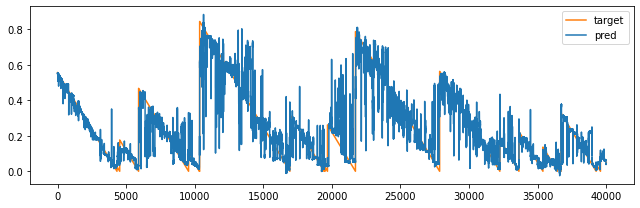

In [53]:
stop=40000
plot_rul(model.predict(data)[:stop],data['rul'][:stop])